In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("accident_prediction_india.csv")
print(df.head())

          State Name City Name  Year    Month Day of Week Time of Day  \
0  Jammu and Kashmir   Unknown  2021      May      Monday        1:46   
1      Uttar Pradesh   Lucknow  2018  January   Wednesday       21:30   
2       Chhattisgarh   Unknown  2023      May   Wednesday        5:37   
3      Uttar Pradesh   Lucknow  2020     June    Saturday        0:31   
4             Sikkim   Unknown  2021   August    Thursday       11:21   

  Accident Severity  Number of Vehicles Involved Vehicle Type Involved  \
0           Serious                            5                 Cycle   
1             Minor                            5                 Truck   
2             Minor                            5            Pedestrian   
3             Minor                            3                   Bus   
4             Minor                            5                 Cycle   

   Number of Casualties  ...         Road Type      Road Condition  \
0                     0  ...  National Highway

In [9]:
print(df.columns)

Index(['State Name', 'Year', 'Month', 'Day of Week', 'Time of Day',
       'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')


In [10]:
print(df.info)

<bound method DataFrame.info of              State Name  Year      Month Day of Week Time of Day  \
0     Jammu and Kashmir  2021        May      Monday        1:46   
1         Uttar Pradesh  2018    January   Wednesday       21:30   
2          Chhattisgarh  2023        May   Wednesday        5:37   
3         Uttar Pradesh  2020       June    Saturday        0:31   
4                Sikkim  2021     August    Thursday       11:21   
...                 ...   ...        ...         ...         ...   
2995         Tamil Nadu  2021    January      Sunday        1:15   
2996        Uttarakhand  2018       July      Sunday       10:12   
2997          Meghalaya  2021    January    Thursday       19:34   
2998          Meghalaya  2023       June      Sunday       20:54   
2999  Arunachal Pradesh  2020  September      Monday        7:19   

     Accident Severity  Number of Vehicles Involved Vehicle Type Involved  \
0              Serious                            5                 Cycle 

# states with most accident

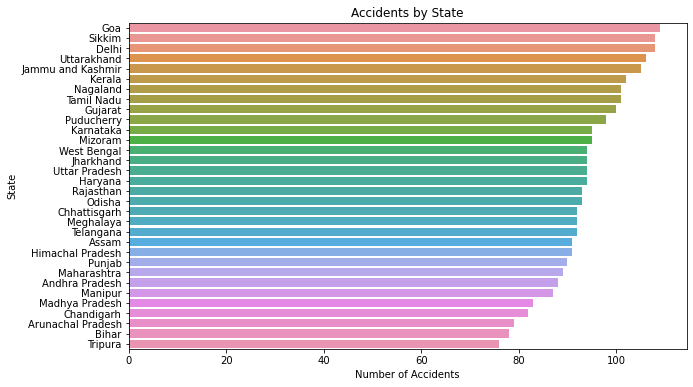

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y='State Name',  
    order=df['State Name'].value_counts().index
)
plt.title("Accidents by State")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.show()


# distribution of accident severity?

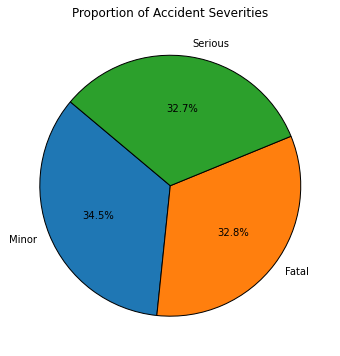

In [36]:
counts = df['Accident Severity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={'edgecolor':'k'}
)
plt.title("Proportion of Accident Severities")
plt.show()

# vehicle type mostly involved 

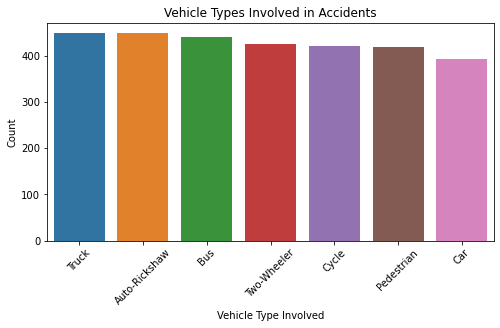

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='Vehicle Type Involved',
    order=df['Vehicle Type Involved'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Vehicle Types Involved in Accidents")
plt.ylabel("Count")
plt.show()


# Which day of the week is worst for accidents?

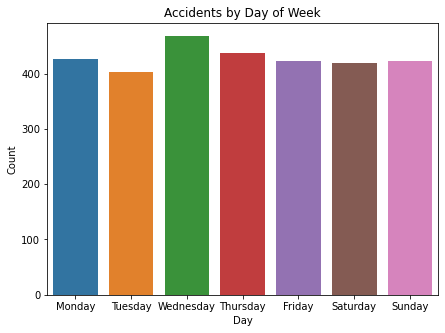

In [23]:
plt.figure(figsize=(7,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df, x='Day of Week', order=order)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()


# How do accidents vary by month?

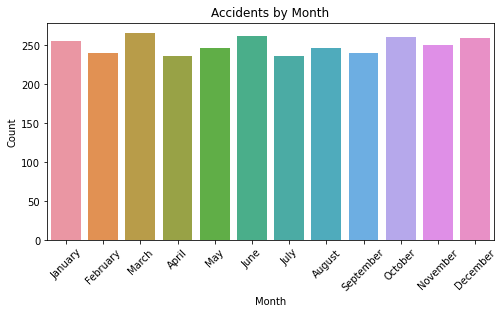

In [24]:
plt.figure(figsize=(8,4))
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data=df, x='Month', order=month_order)
plt.xticks(rotation=45)
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


# Do certain weather conditions lead to more accidents?

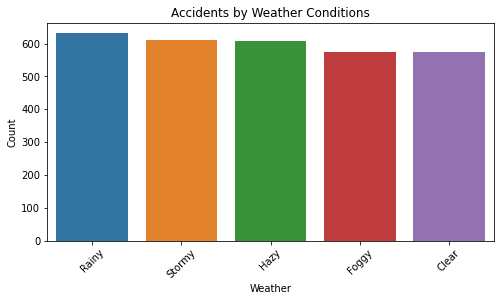

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='Weather Conditions',
    order=df['Weather Conditions'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()


# Which road types are most accident‑prone?

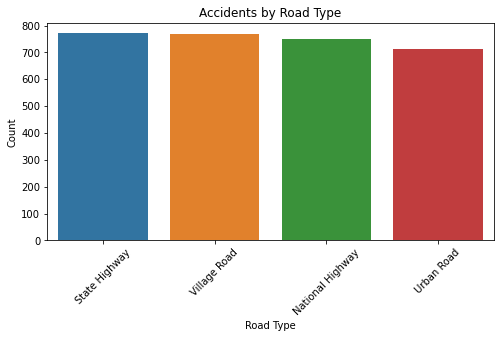

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='Road Type',
    order=df['Road Type'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.show()


# How does lighting condition affect accident counts?

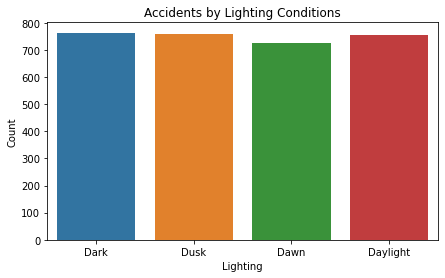

In [31]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Lighting Conditions')
plt.title("Accidents by Lighting Conditions")
plt.xlabel("Lighting")
plt.ylabel("Count")
plt.show()


# Fatalities by Accident Severity

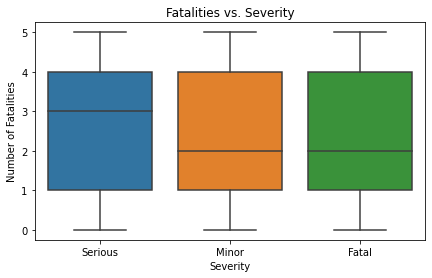

In [32]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x='Accident Severity',
    y='Number of Fatalities'
)
plt.title("Fatalities vs. Severity")
plt.xlabel("Severity")
plt.ylabel("Number of Fatalities")
plt.show()


# Average casualties per accident by vehicle type

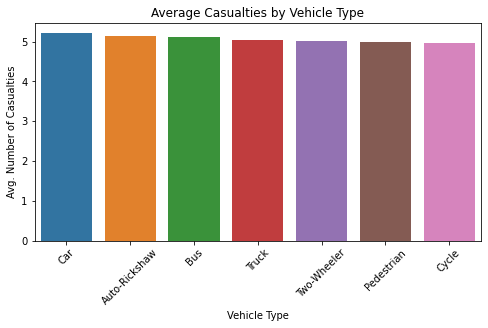

In [33]:
avg_cas = df.groupby('Vehicle Type Involved')['Number of Casualties'] \
            .mean() \
            .sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x=avg_cas.index,
    y=avg_cas.values
)
plt.xticks(rotation=45)
plt.title("Average Casualties by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Avg. Number of Casualties")
plt.show()


# speed limit distribution 

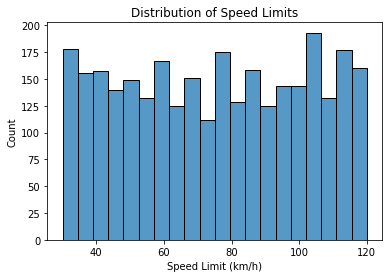

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Speed Limit (km/h)', bins=20)
plt.title("Distribution of Speed Limits")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Count")
plt.show()


# correlation heatmap

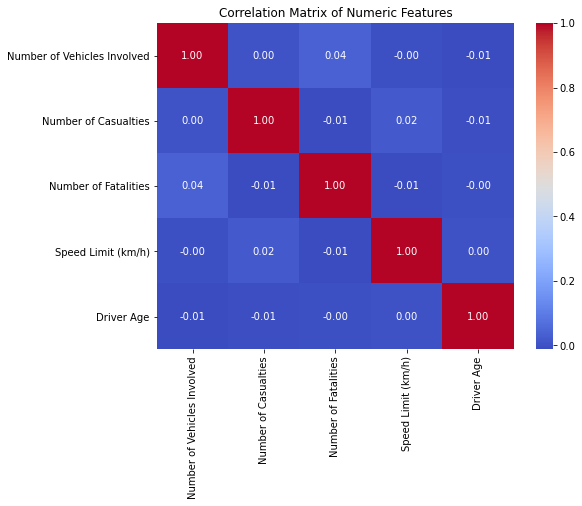

In [44]:
plt.figure(figsize=(8,6))
num_cols = [
    'Number of Vehicles Involved', 
    'Number of Casualties', 
    'Number of Fatalities',
    'Speed Limit (km/h)', 
    'Driver Age'
]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [39]:
print(df.columns)


Index(['State Name', 'Year', 'Month', 'Day of Week', 'Time of Day',
       'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')


# line plot : accident by year

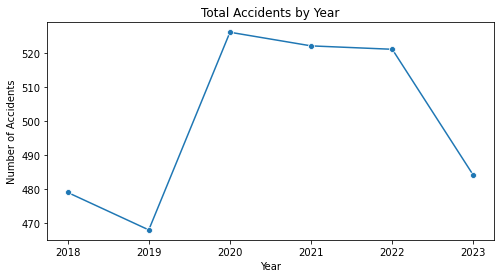

In [45]:
yearly = df['Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
plt.title("Total Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(yearly.index.astype(int))
plt.show()


# Scatter Plot: Speed Limit vs. Fatalities

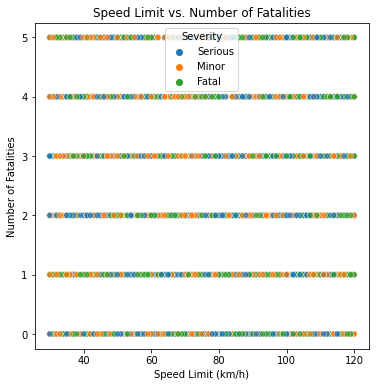

In [47]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df, 
    x='Speed Limit (km/h)', 
    y='Number of Fatalities', 
    hue='Accident Severity', 
    alpha=0.7
)
plt.title("Speed Limit vs. Number of Fatalities")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Number of Fatalities")
plt.legend(title="Severity")
plt.show()

# Do higher speed limits correlate with more severe accidents?

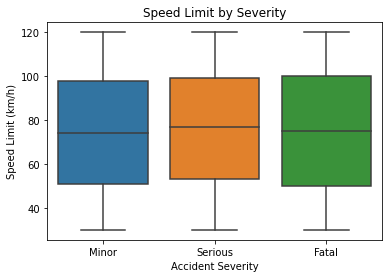

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Accident Severity',
    y='Speed Limit (km/h)',
    order=['Minor','Serious','Fatal']
)
plt.title("Speed Limit by Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit (km/h)")
plt.show()

# #Does driver age affect how many casualties occur?


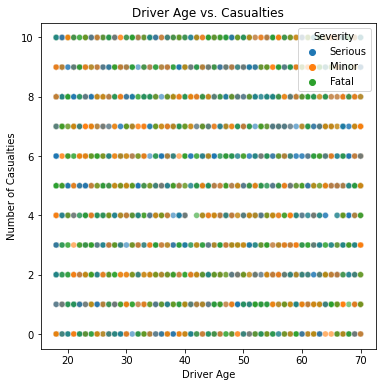

In [50]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df,
    x='Driver Age',
    y='Number of Casualties',
    hue='Accident Severity',
    alpha=0.6
)
plt.title("Driver Age vs. Casualties")
plt.xlabel("Driver Age")
plt.ylabel("Number of Casualties")
plt.legend(title="Severity")
plt.show()

# Are accidents involving alcohol more likely to be fatal?


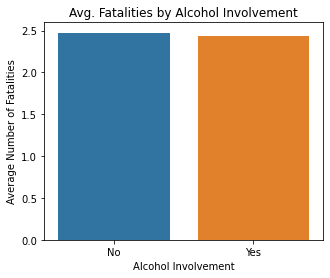

In [51]:
summary = df.groupby('Alcohol Involvement')['Number of Fatalities'].mean()
plt.figure(figsize=(5,4))
sns.barplot(
    x=summary.index,
    y=summary.values
)
plt.title("Avg. Fatalities by Alcohol Involvement")
plt.xlabel("Alcohol Involvement")
plt.ylabel("Average Number of Fatalities")
plt.show()

# Do certain weather conditions co‑occur with poorer road surfaces?


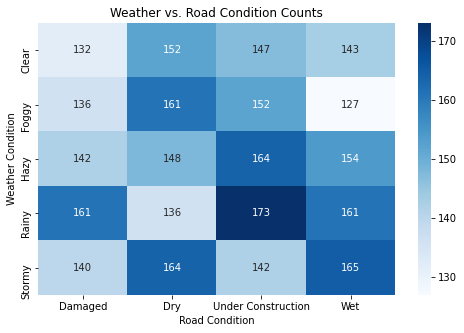

In [53]:
pivot = pd.crosstab(df['Weather Conditions'], df['Road Condition'])
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=True,
    fmt="d",
    cmap="Blues"
    )
plt.title("Weather vs. Road Condition Counts")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.show()

# Which vehicle types tend to involve multiple vehicles?


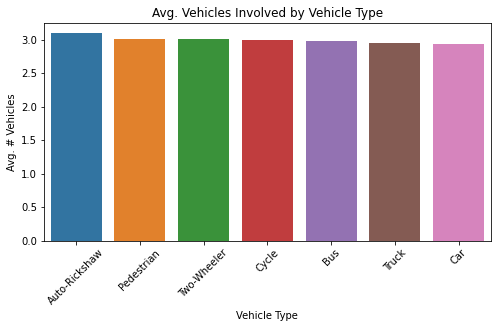

In [56]:

avg_veh = df.groupby('Vehicle Type Involved')['Number of Vehicles Involved'] \
            .mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(
    x=avg_veh.index,
    y=avg_veh.values
)
plt.xticks(rotation=45)
plt.title("Avg. Vehicles Involved by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Avg. # Vehicles")
plt.show()


# Are unlicensed drivers more prone to serious/fatal crashes?

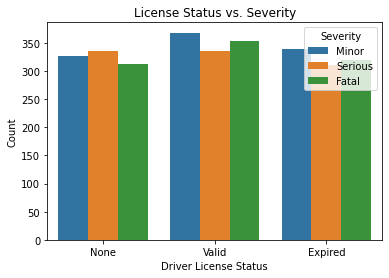

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Driver License Status',
    hue='Accident Severity',
    hue_order=['Minor','Serious','Fatal']
)
plt.title("License Status vs. Severity")
plt.xlabel("Driver License Status")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()

# Does poor lighting lead to more fatalities?

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='Lighting Conditions',
    y='Number of Fatalities',
    estimator=sum,
    order=sorted(df['Lighting Conditions'].unique())
)
plt.xticks(rotation=45)
plt.title("Total Fatalities by Lighting")
plt.xlabel("Lighting Condition")
plt.ylabel("Total Fatalities")
plt.show()

# Are male or female drivers more involved in serious/fatal accidents?


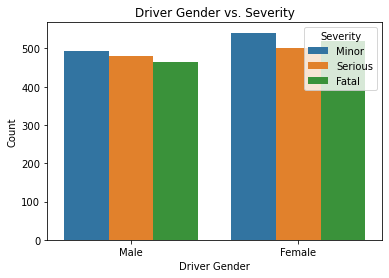

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Driver Gender',
    hue='Accident Severity',
    hue_order=['Minor','Serious','Fatal']
)
plt.title("Driver Gender vs. Severity")
plt.xlabel("Driver Gender")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()
